# Automatic Modulation Classification - SISO Systems
Fabiano Rocha De Oliveira


## Configuração do PC do Google Colab

In [ ]:
!apt install neofetch && neofetch

Reading package lists... Done
Building dependency tree       
Reading state information... Done
neofetch is already the newest version (3.4.0-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
            .-/+oossssoo+/-. 
        `:+ssssssssssssssssss+:` 
      -+ssssssssssssssssssyyssss+- 
    .ossssssssssssssssssdMMMNysssso. 
   /ssssssssssshdmmNNmmyNMMMMhssssss/ 
  +ssssssssshmydMMMMMMMNddddyssssssss+ 
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/ 
.ssssssssdMMMNhsssssssssshNMMMdssssssss. 
+sssshhhyNMMNyssssssssssssyNMMMysssssss+ 
ossyNMMMNyMMhsssssssssssssshmmmhssssssso 
ossyNMMMNyMMhsssssssssssssshmmmhssssssso 
+sssshhhyNMMNyssssssssssssyNMMMysssssss+ 
.ssssssssdMMMNhsssssssssshNMMMdssssssss. 
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/ 
  +sssssssssdmydMMMMMMMMddddyssssssss+ 
   /ssssssssssshdmNNNNmyNMMMMhssssss/ 
    .ossssssssssssssssssdMMMNysssso. 
      -+sssssssssssssssssyyyssss+- 
        `:+ssssssssssssssssss+:` 
            .-/+oossssoo+/-. 
root@161ba9fca4be 
---

In [ ]:
!python -V

Python 3.7.10


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


## Download e Leitura do dataset


Download do dataset:


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1dfmJY3MeuRTxXRVqpaDpWxaHnU7Yi3Qd' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1dfmJY3MeuRTxXRVqpaDpWxaHnU7Yi3Qd" -O RML2016.10a.pkl && rm -rf /tmp/cookies.txt

--2021-03-19 09:43:31--  https://docs.google.com/uc?export=download&confirm=cej9&id=1dfmJY3MeuRTxXRVqpaDpWxaHnU7Yi3Qd
Resolving docs.google.com (docs.google.com)... 172.217.7.174, 2607:f8b0:4004:804::200e
Connecting to docs.google.com (docs.google.com)|172.217.7.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-50-docs.googleusercontent.com/docs/securesc/iegccp3g7smmsr5tn7b40a14mtpujlc0/mo53oqlbgo8qhkspscfpks2cu0scbtql/1616146950000/08333994180247730469/15473133036711235437Z/1dfmJY3MeuRTxXRVqpaDpWxaHnU7Yi3Qd?e=download [following]
--2021-03-19 09:43:31--  https://doc-00-50-docs.googleusercontent.com/docs/securesc/iegccp3g7smmsr5tn7b40a14mtpujlc0/mo53oqlbgo8qhkspscfpks2cu0scbtql/1616146950000/08333994180247730469/15473133036711235437Z/1dfmJY3MeuRTxXRVqpaDpWxaHnU7Yi3Qd?e=download
Resolving doc-00-50-docs.googleusercontent.com (doc-00-50-docs.googleusercontent.com)... 172.217.15.97, 2607:f8b0:4004:811::2001
Connecting to doc-00-5

Leitura do dataset:

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

full_dataset = pickle.load(open("RML2016.10a.pkl",'rb'),encoding='latin1')
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], full_dataset.keys())))), [1,0])

digital_mods    = ['8PSK', 'BPSK', 'QAM16', 'QAM64', 'QPSK']

X = []
label = []

for mod in digital_mods:
#for mod in mods:
   for snr in snrs:
        X.append(full_dataset[(mod,snr)])
        for i in range(full_dataset[(mod,snr)].shape[0]):  label.append((mod,snr))
X = np.vstack(X)

# Split and Shuffle
np.random.seed(10475)
n_examples = X.shape[0]
n_train = int(n_examples * 0.7)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]

# Codificação One-Hot

def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1

Y_train = to_onehot(list(map(lambda x: digital_mods.index(label[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: digital_mods.index(label[x][0]), test_idx)))

in_shp = list(X_train.shape[1:])
classes = digital_mods


Amostras do dataset:


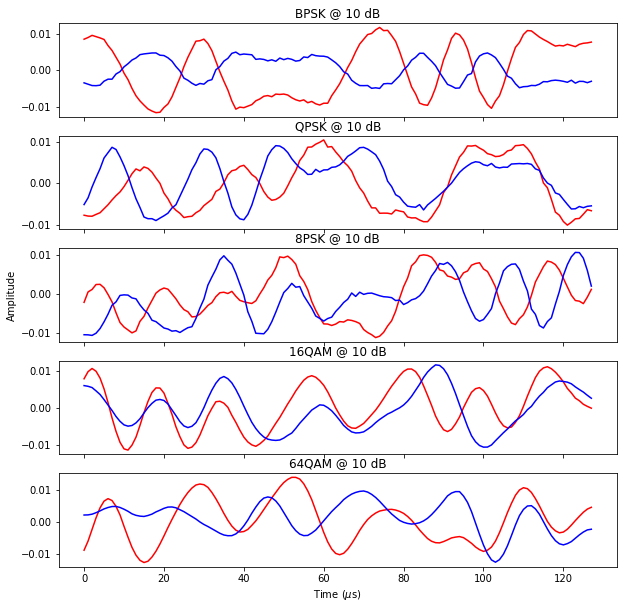

In [ ]:
def sym(S):
  I = S[0,:] * np.cos(2*np.pi*10**6*np.arange(128))
  Q = S[1,:] * np.cos(2*np.pi*10**6*np.arange(128))
  return I, Q


# Exemplo das 5 modulações no tempo
nFigs = 5
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(nFigs, 1, 1);
I, Q = sym(full_dataset['BPSK', 10][18,:,:])
plt.plot(I, color='r'); plt.plot(Q, color='b')
plt.title('BPSK @ 10 dB')

ax2 = plt.subplot(nFigs, 1, 2, sharex=ax1);
I, Q = sym(full_dataset['QPSK', 10][18,:,:])
plt.plot(I, color='r'); plt.plot(Q, color='b')
plt.title('QPSK @ 10 dB')


ax3 = plt.subplot(nFigs, 1, 3, sharex=ax1)
I, Q = sym(full_dataset['8PSK', 10][18,:,:])
plt.plot(I, color='r'); plt.plot(Q, color='b')
plt.title('8PSK @ 10 dB')
plt.ylabel('Amplitude');

ax4 = plt.subplot(nFigs, 1, 4, sharex=ax1)
I, Q = sym(full_dataset['QAM16', 10][18,:,:])
plt.plot(I, color='r'); plt.plot(Q, color='b')
plt.title('16QAM @ 10 dB')

ax5 = plt.subplot(nFigs, 1, 5, sharex=ax1)
I, Q = sym(full_dataset['QAM64', 10][18,:,:])
plt.plot(I, color='r'); plt.plot(Q, color='b')
plt.title('64QAM @ 10 dB')

plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.xlabel(r'Time ($\mu$s)')
plt.show()

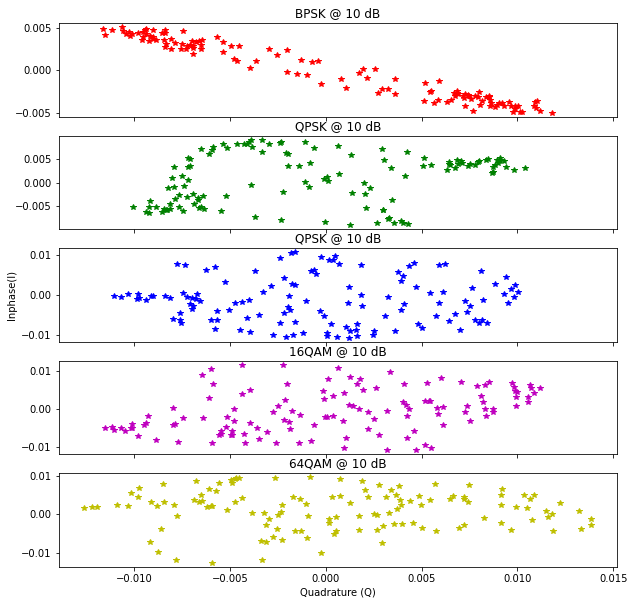

In [ ]:
def const(S):
  I = S[0,:]
  Q = S[1,:]
  return I,Q

nFigs = 5
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(nFigs, 1, 1);
I, Q = const(full_dataset['BPSK', 10][18,:,:])
plt.plot(I,Q,'*', color='r')
plt.title('BPSK @ 10 dB')

ax2 = plt.subplot(nFigs, 1, 2, sharex=ax1);
I, Q = const(full_dataset['QPSK', 10][18,:,:])
plt.plot(I,Q,'*', color='g')
plt.title('QPSK @ 10 dB')

ax3 = plt.subplot(nFigs, 1, 3, sharex=ax1);
I, Q = const(full_dataset['8PSK', 10][18,:,:])
plt.plot(I,Q,'*', color='b')
plt.title('QPSK @ 10 dB')
plt.ylabel('Inphase(I)')

ax4 = plt.subplot(nFigs, 1, 4, sharex=ax1)
I, Q = const(full_dataset['QAM16', 10][18,:,:])
plt.plot(I,Q,'*', color='m')
plt.title('16QAM @ 10 dB')


ax5 = plt.subplot(nFigs, 1, 5, sharex=ax1)
I, Q = const(full_dataset['QAM64', 10][18,:,:])
plt.plot(I,Q,'*', color='y')
plt.title('64QAM @ 10 dB')
plt.xlabel('Quadrature (Q)')

plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

Para comparação:
- Sem Ruído
- Canal ideal (Sem multipercurso ou outro efeito)

![const](https://www.researchgate.net/profile/Arun-Agarwal-10/publication/287208899/figure/fig4/AS:307948250255363@1450431992487/BPSK-4-QAM-and-16-QAM-constellation-diagrams-10.png)

![const8psk](https://www.researchgate.net/publication/301353669/figure/fig1/AS:649634921857045@1531896443115/8-PSK-Constellation.png)

![const64](https://i.pinimg.com/originals/5e/60/67/5e606718b64e80e77160f38e16471b00.gif)

## Rede Neural Densa - DNN

In [ ]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Reshape, Dense, Dropout, Activation, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

Modelo:

In [ ]:
dr = 0.7 # dropout rate (%)
model = Sequential()

model.add(Dense(512,input_shape=(2,128) , activation="relu", name="dense1"))
model.add(Dropout(dr))

model.add(Dense(256, activation="relu", name="dense2"))
model.add(Dropout(dr))

model.add(Flatten())
model.add(Dense(256, activation="relu", name="dense3"))

model.add(Dense( len(classes), kernel_initializer='he_normal', name="output" ))

model.add(Activation('softmax'))
model.add(Reshape([len(classes)]))

opt= tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 2, 512)            66048     
_________________________________________________________________
dropout (Dropout)            (None, 2, 512)            0         
_________________________________________________________________
dense2 (Dense)               (None, 2, 256)            131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense3 (Dense)               (None, 256)               131328    
_________________________________________________________________
output (Dense)               (None, 5)                 1

Treinamento:

In [ ]:
epochs = 100
batch_size = 512

history = model.fit(X_train,Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(X_test, Y_test),
                    callbacks = [EarlyStopping(monitor='accuracy', patience=5,
                                               verbose=1, mode='auto')]
                    )

Epoch 1/100
137/137 - 2s - loss: 1.6095 - accuracy: 0.2039 - val_loss: 1.6083 - val_accuracy: 0.2108
Epoch 2/100
137/137 - 1s - loss: 1.5830 - accuracy: 0.2500 - val_loss: 1.4978 - val_accuracy: 0.2988
Epoch 3/100
137/137 - 1s - loss: 1.4717 - accuracy: 0.3101 - val_loss: 1.4264 - val_accuracy: 0.3258
Epoch 4/100
137/137 - 1s - loss: 1.4396 - accuracy: 0.3237 - val_loss: 1.4227 - val_accuracy: 0.3280
Epoch 5/100
137/137 - 1s - loss: 1.4310 - accuracy: 0.3274 - val_loss: 1.4221 - val_accuracy: 0.3249
Epoch 6/100
137/137 - 1s - loss: 1.4256 - accuracy: 0.3285 - val_loss: 1.4098 - val_accuracy: 0.3295
Epoch 7/100
137/137 - 1s - loss: 1.4229 - accuracy: 0.3307 - val_loss: 1.4116 - val_accuracy: 0.3275
Epoch 8/100
137/137 - 1s - loss: 1.4195 - accuracy: 0.3322 - val_loss: 1.4065 - val_accuracy: 0.3317
Epoch 9/100
137/137 - 1s - loss: 1.4180 - accuracy: 0.3326 - val_loss: 1.4094 - val_accuracy: 0.3341
Epoch 10/100
137/137 - 1s - loss: 1.4163 - accuracy: 0.3360 - val_loss: 1.4086 - val_accura

[1.2852052450180054, 0.41883334517478943]


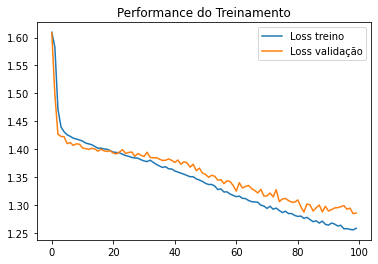

In [ ]:
plt.figure()
plt.title('Performance do Treinamento')
plt.plot(history.epoch, history.history['loss'], label='Loss treino')
plt.plot(history.epoch, history.history['val_loss'], label='Loss validação')
plt.legend()

score = model.evaluate(X_test, Y_test, verbose=0, batch_size=batch_size)
print(score)

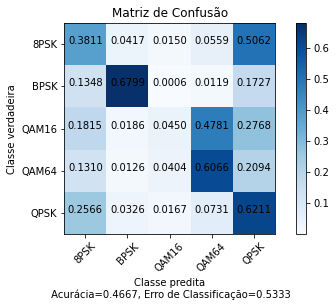

In [ ]:
# Definição da função para plotar a CM
def plot_confusion_matrix(cm, target_names, title='Confusion matrix'):
  """"
  Baseada na biblioteca ScikitLearn
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

  """

  accuracy = np.trace(cm) / float(np.sum(cm)) # acuracia
  misclass = 1 - accuracy                     # erro de classificacao

  cmap = plt.get_cmap('Blues') #Cor de fundo, no caso niveis azul

  # gera a figura da matriz de confusao
  plt.figure()
  im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  # gera as legendas com um angulo de 45 graus
  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

  # gera a escrita no interior dos quadrados
  for i in range(0, cm.shape[0]):
    for j in range(0, cm.shape[1]):
      plt.text(j, i, "{:0.4f}".format(cm[i, j]), horizontalalignment="center", color="black")

  plt.tight_layout()
  plt.ylabel('Classe verdadeira')
  plt.xlabel('Classe predita\n Acurácia={:0.4f}, Erro de Classificação={:0.4f}'.format(accuracy, misclass))
  plt.show()
# fim plot_confusion_matrix

# Matriz de Confusao de todo o dataset
#X = X                   todo o dataset       
Y = to_onehot(list(map(lambda x: digital_mods.index(label[x][0]), np.arange(X.shape[0]))))   # Y sao as labels

y_pred = np.argmax(model.predict(X, batch_size=128), axis=1)

confmatrix = np.zeros([len(classes),len(classes)])      # Matriz de confusao
confmatrix_norm = np.zeros([len(classes),len(classes)]) # Matriz de confusao normalizada
for i in range(0,y_pred.shape[0]):
  j = list(Y[i,:]).index(1)
  k = y_pred[i]
  confmatrix[j,k] = confmatrix[j,k] + 1

for i in range(0,len(classes)):
  confmatrix_norm[i,:] = confmatrix[i,:] / np.sum(confmatrix[i,:])


plot_confusion_matrix(confmatrix_norm,classes,"Matriz de Confusão")

In [ ]:
acc = {}
for snr in snrs:
    test_SNRs = list(map(lambda x: label[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    
 

    test_Y_i_hat = model.predict(test_X_i)

    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1

    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    
    #plot_confusion_matrix(confnorm, classes, title="Martiz de Confusão para SNR=%d"%(snr))
    
 
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    acc[snr] = 1.0*cor/(cor+ncor)

{-20: 0.18815104166666666, -18: 0.20460526315789473, -16: 0.22916666666666666, -14: 0.2272429600523903, -12: 0.2090663058186739, -10: 0.2245847176079734, -8: 0.28677966101694913, -6: 0.3932135728542914, -4: 0.46484641638225255, -2: 0.5442708333333334, 0: 0.5492297387809779, 2: 0.5383104125736738, 4: 0.5382513661202186, 6: 0.5360480640854473, 8: 0.5305003427004797, 10: 0.525523560209424, 12: 0.5653896961690885, 14: 0.5157452764170749, 16: 0.5430072225869993, 18: 0.5672323759791122}


Text(0.5, 1.0, 'Acurácia da CNN2 usandoo o dataset RadioML 2016.10a')

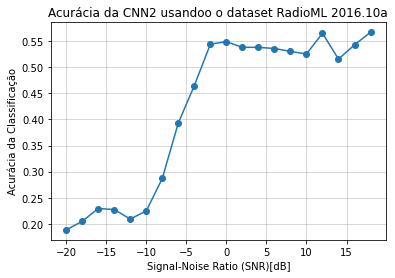

In [ ]:
print(acc)
plt.plot(snrs, list(map(lambda x: acc[x], snrs)), '-o')
plt.grid(alpha=0.5, linewidth=1)
plt.xlabel("Signal-Noise Ratio (SNR)[dB]")
plt.ylabel("Acurácia da Classificação")
plt.title("Acurácia da CNN2 usando o dataset RadioML 2016.10a")

## Rede Neural Convolucional - CNN

In [ ]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Input, Reshape, Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

Modelo:

In [ ]:
dr = 0.3 # dropout rate (%)
model = Sequential()

model.add(Reshape(in_shp+[1], input_shape=in_shp))  

model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(64, (1, 3), padding='valid', activation="relu", name="conv1"))
model.add(Dropout(dr))

model.add(ZeroPadding2D((0, 2))) 
model.add(Conv2D(16, (2, 3), padding="valid", activation="relu", name="conv2"))
model.add(Dropout(dr))

model.add(Flatten())

model.add(Dense(128, activation="relu", name="dense2"))

model.add(Dropout(dr))

model.add(Dense( len(classes), name="output" ))

model.add(Activation('softmax'))
model.add(Reshape([len(classes)]))

opt= tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 2, 132, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 130, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 130, 64)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 2, 134, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 1, 132, 16)        6160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 132, 16)       

Treinamento:

In [ ]:
epochs = 100
batch_size = 1024

history = model.fit(X_train,Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(X_test, Y_test),
                    callbacks = [EarlyStopping(monitor='accuracy', patience=10,
                                               verbose=1, mode='auto')]
                    )

Epoch 1/100
69/69 - 4s - loss: 1.6086 - accuracy: 0.2160 - val_loss: 1.6064 - val_accuracy: 0.2006
Epoch 2/100
69/69 - 1s - loss: 1.5803 - accuracy: 0.2761 - val_loss: 1.5474 - val_accuracy: 0.2756
Epoch 3/100
69/69 - 1s - loss: 1.5161 - accuracy: 0.2932 - val_loss: 1.4894 - val_accuracy: 0.2899
Epoch 4/100
69/69 - 1s - loss: 1.4500 - accuracy: 0.3223 - val_loss: 1.4161 - val_accuracy: 0.3333
Epoch 5/100
69/69 - 1s - loss: 1.4057 - accuracy: 0.3389 - val_loss: 1.3813 - val_accuracy: 0.3530
Epoch 6/100
69/69 - 1s - loss: 1.3533 - accuracy: 0.3763 - val_loss: 1.3280 - val_accuracy: 0.3962
Epoch 7/100
69/69 - 1s - loss: 1.2999 - accuracy: 0.4057 - val_loss: 1.2588 - val_accuracy: 0.4251
Epoch 8/100
69/69 - 1s - loss: 1.2564 - accuracy: 0.4228 - val_loss: 1.2235 - val_accuracy: 0.4294
Epoch 9/100
69/69 - 1s - loss: 1.2263 - accuracy: 0.4307 - val_loss: 1.1873 - val_accuracy: 0.4430
Epoch 10/100
69/69 - 1s - loss: 1.2085 - accuracy: 0.4357 - val_loss: 1.1865 - val_accuracy: 0.4350
Epoch 11/

[1.01991605758667, 0.515333354473114]


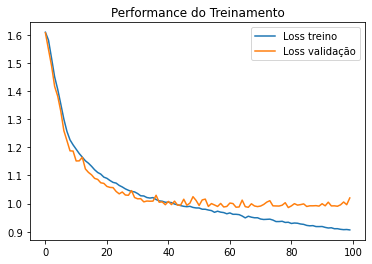

In [ ]:
plt.figure()
plt.title('Performance do Treinamento')
plt.plot(history.epoch, history.history['loss'], label='Loss treino')
plt.plot(history.epoch, history.history['val_loss'], label='Loss validação')
plt.legend()

score = model.evaluate(X_test, Y_test, verbose=0, batch_size=batch_size)
print(score)

Validação - Plot da Confusion Matrix:


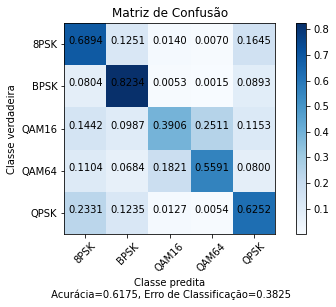

In [ ]:
# Matriz de Confusao de todo o dataset
#X = X                   todo o dataset       
Y = to_onehot(list(map(lambda x: digital_mods.index(label[x][0]), np.arange(X.shape[0]))))   # Y sao as labels

y_pred = np.argmax(model.predict(X, batch_size=128), axis=1)

confmatrix = np.zeros([len(classes),len(classes)])      # Matriz de confusao
confmatrix_norm = np.zeros([len(classes),len(classes)]) # Matriz de confusao normalizada
for i in range(0,y_pred.shape[0]):
  j = list(Y[i,:]).index(1)
  k = y_pred[i]
  confmatrix[j,k] = confmatrix[j,k] + 1

for i in range(0,len(classes)):
  confmatrix_norm[i,:] = confmatrix[i,:] / np.sum(confmatrix[i,:])


plot_confusion_matrix(confmatrix_norm,classes,"Matriz de Confusão")

In [ ]:
acc = {}
for snr in snrs:
    test_SNRs = list(map(lambda x: label[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    
 

    test_Y_i_hat = model.predict(test_X_i)

    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1

    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    
    #plot_confusion_matrix(confnorm, classes, title="Martiz de Confusão para SNR=%d"%(snr))
    
 
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    acc[snr] = 1.0*cor/(cor+ncor)

{-20: 0.19140625, -18: 0.19473684210526315, -16: 0.22311827956989247, -14: 0.21611001964636542, -12: 0.2489851150202977, -10: 0.29700996677740865, -8: 0.3552542372881356, -6: 0.43912175648702595, -4: 0.5146757679180888, -2: 0.62109375, 0: 0.6744809109176155, 2: 0.6994106090373281, 4: 0.7083333333333334, 6: 0.7076101468624834, 8: 0.6799177518848526, 10: 0.7146596858638743, 12: 0.702774108322325, 14: 0.7137858642407278, 16: 0.6999343401181878, 18: 0.7147519582245431}


Text(0.5, 1.0, 'Acurácia da CNN2 usando o dataset RadioML 2016.10a')

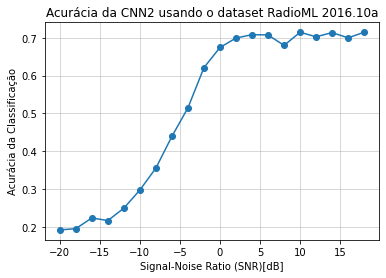

In [ ]:
print(acc)
plt.plot(snrs, list(map(lambda x: acc[x], snrs)), '-o')
plt.grid(alpha=0.5, linewidth=1)
plt.xlabel("Signal-Noise Ratio (SNR)[dB]")
plt.ylabel("Acurácia da Classificação")
plt.title("Acurácia da CNN2 usando o dataset RadioML 2016.10a")


## Rede Neural Recorrente - Long Short-Term Memory (LSTM)

Modelo da rede

In [ ]:
dr = 0.3  # dropout

input = Input(shape=(1, 2, 128))

input_pad = ZeroPadding2D((0, 2), data_format="channels_first")(input)

x1 = Conv2D(50, (1, 7), padding='valid', activation="relu", name="conv1", data_format="channels_first")(input_pad)
x1 = Dropout(dr)(x1)
x1_pad = ZeroPadding2D((0, 2), data_format="channels_first")(x1)

x2 = Conv2D(50, (1, 7), padding="valid", activation="relu", name="conv2", data_format="channels_first")(x1_pad)
x2 = Dropout(dr)(x2)
x2 = ZeroPadding2D((0, 2), data_format="channels_first")(x2)

x3 = Conv2D(50, (1, 7), padding='valid', activation="relu", name="conv3", data_format="channels_first")(x2)
x3 = Dropout(dr)(x3)

concat = tf.keras.layers.concatenate([x1, x3])

concat_size = list(np.shape(concat))
input_dim = int(concat_size[-1] * concat_size[-2])
timesteps = int(concat_size[-3])

concat = Reshape((timesteps, input_dim))(concat)

lstm_out = LSTM(50, input_dim=input_dim, input_length=timesteps)(concat)

dense1 = Dense(128, activation='relu', name="dense1")(lstm_out)

dense1_dr = Dropout(dr)(dense1)
dense2 = Dense(len(classes), name="dense2")(dense1_dr)
softmax = Activation('softmax')(dense2)

output = Reshape([len(classes)])(softmax)

model = tf.keras.Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1, 2, 128)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_8 (ZeroPadding2D (None, 1, 2, 132)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 2, 126)   400         zero_padding2d_8[0][0]           
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 50, 2, 126)   0           conv1[0][0]                      
____________________________________________________________________________________________

Treinamento:

In [ ]:
epochs = 100
batch_size = 1024

X_train = np.reshape(X_train, (-1, 1, 2, 128))
X_test = np.reshape(X_test, (-1, 1, 2, 128))

history = model.fit(X_train,
                    Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(X_test, Y_test))

Epoch 1/100
69/69 - 7s - loss: 1.6094 - val_loss: 1.6095
Epoch 2/100
69/69 - 5s - loss: 1.6052 - val_loss: 1.5902
Epoch 3/100
69/69 - 5s - loss: 1.5373 - val_loss: 1.4832
Epoch 4/100
69/69 - 5s - loss: 1.4329 - val_loss: 1.3815
Epoch 5/100
69/69 - 5s - loss: 1.3438 - val_loss: 1.2905
Epoch 6/100
69/69 - 5s - loss: 1.2816 - val_loss: 1.2611
Epoch 7/100
69/69 - 5s - loss: 1.2555 - val_loss: 1.2494
Epoch 8/100
69/69 - 5s - loss: 1.2400 - val_loss: 1.2312
Epoch 9/100
69/69 - 5s - loss: 1.2271 - val_loss: 1.2140
Epoch 10/100
69/69 - 5s - loss: 1.2173 - val_loss: 1.2097
Epoch 11/100
69/69 - 5s - loss: 1.2065 - val_loss: 1.1933
Epoch 12/100
69/69 - 5s - loss: 1.1979 - val_loss: 1.1877
Epoch 13/100
69/69 - 5s - loss: 1.1842 - val_loss: 1.1918
Epoch 14/100
69/69 - 5s - loss: 1.1789 - val_loss: 1.1567
Epoch 15/100
69/69 - 5s - loss: 1.1665 - val_loss: 1.1601
Epoch 16/100
69/69 - 5s - loss: 1.1597 - val_loss: 1.1610
Epoch 17/100
69/69 - 5s - loss: 1.1597 - val_loss: 1.1517
Epoch 18/100
69/69 - 5s

Analise do treinamento:

0.9433220028877258


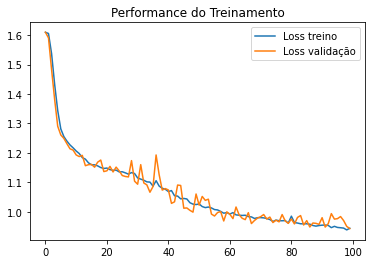

In [ ]:
plt.figure()
plt.title('Performance do Treinamento')
plt.plot(history.epoch, history.history['loss'], label='Loss treino')
plt.plot(history.epoch, history.history['val_loss'], label='Loss validação')
plt.legend()

score = model.evaluate(X_test, Y_test, verbose=0, batch_size=batch_size)
print(score)

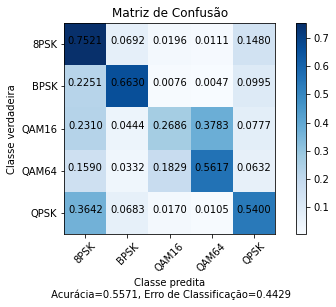

In [ ]:
# Matriz de Confusao de todo o dataset
X = np.reshape(X, (-1, 1, 2, 128))       
Y = to_onehot(list(map(lambda x: digital_mods.index(label[x][0]), np.arange(X.shape[0]))))   # Y sao as labels

y_pred = np.argmax(model.predict(X, batch_size=128), axis=1)

confmatrix = np.zeros([len(classes),len(classes)])      # Matriz de confusao
confmatrix_norm = np.zeros([len(classes),len(classes)]) # Matriz de confusao normalizada
for i in range(0,y_pred.shape[0]):
  j = list(Y[i,:]).index(1)
  k = y_pred[i]
  confmatrix[j,k] = confmatrix[j,k] + 1

for i in range(0,len(classes)):
  confmatrix_norm[i,:] = confmatrix[i,:] / np.sum(confmatrix[i,:])


plot_confusion_matrix(confmatrix_norm,classes,"Matriz de Confusão")

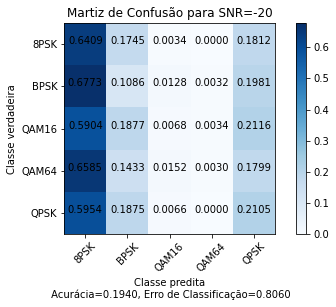

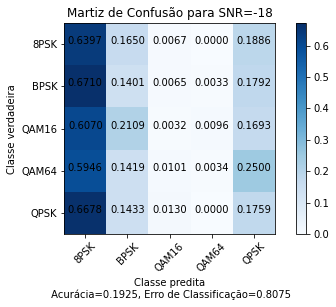

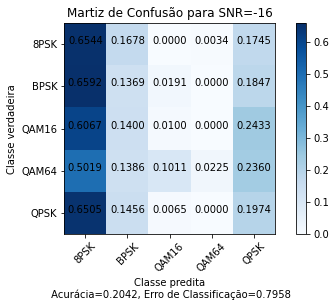

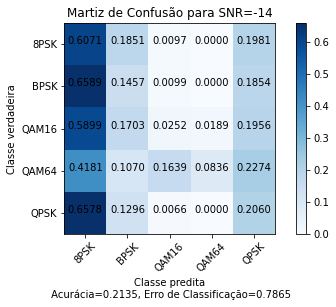

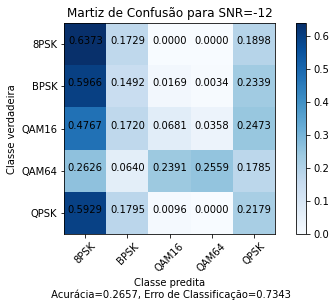

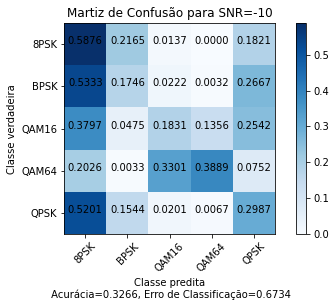

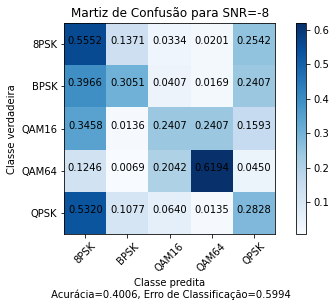

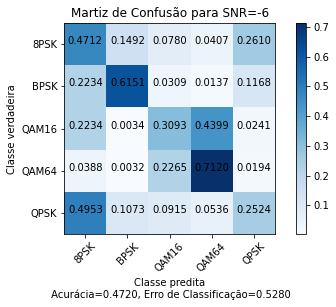

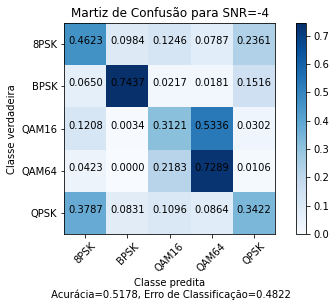

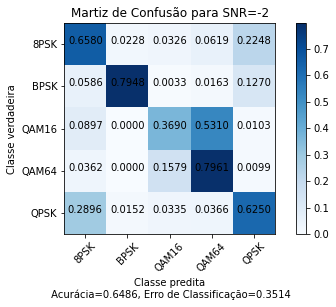

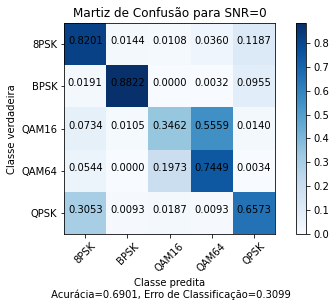

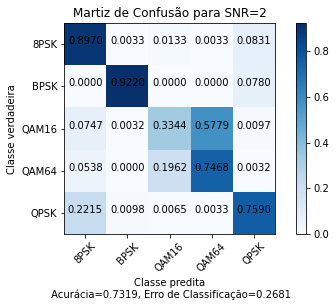

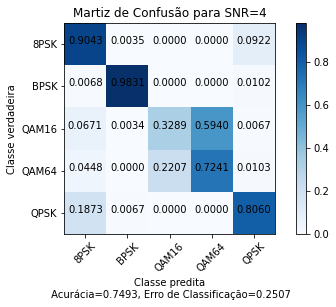

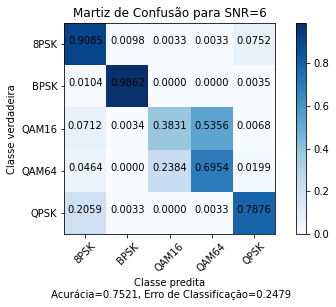

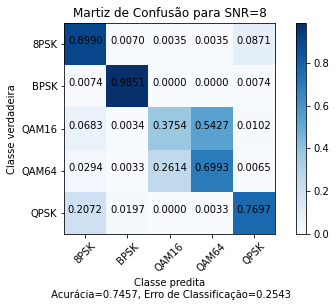

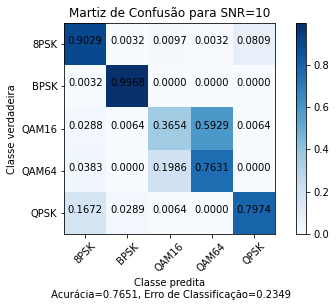

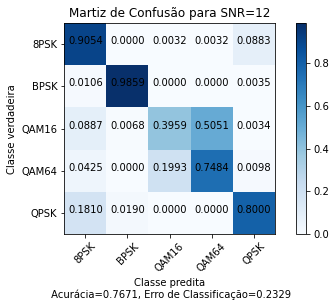

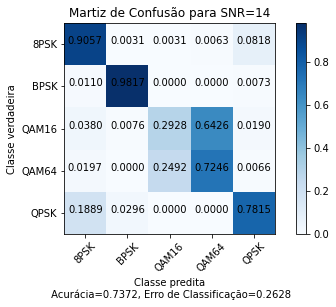

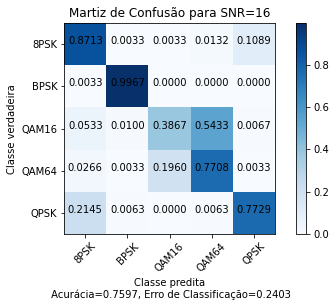

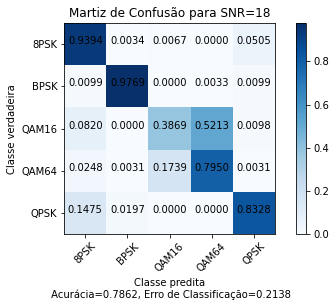

In [ ]:
acc = {}
for snr in snrs:
    test_SNRs = list(map(lambda x: label[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    
 

    test_Y_i_hat = model.predict(test_X_i)

    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1

    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    
    plot_confusion_matrix(confnorm, classes, title="Martiz de Confusão para SNR=%d"%(snr))
    
 
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    acc[snr] = 1.0*cor/(cor+ncor)

{-20: 0.19010416666666666, -18: 0.19013157894736843, -16: 0.20698924731182797, -14: 0.2134905042567125, -12: 0.2672530446549391, -10: 0.32425249169435216, -8: 0.4, -6: 0.47105788423153694, -4: 0.5119453924914675, -2: 0.6510416666666666, 0: 0.6925653047555258, 2: 0.7295350360183366, 4: 0.7472677595628415, 6: 0.7523364485981309, 8: 0.7409184372858122, 10: 0.7643979057591623, 12: 0.7681638044914135, 14: 0.7452764170748776, 16: 0.7603414313854235, 18: 0.7852480417754569}


Text(0.5, 1.0, 'Acurácia da CNN2 usando o dataset RadioML 2016.10a')

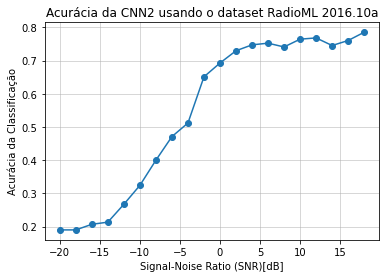

In [ ]:
print(acc)
plt.plot(snrs, list(map(lambda x: acc[x], snrs)), '-o')
plt.grid(alpha=0.5, linewidth=1)
plt.xlabel("Signal-Noise Ratio (SNR)[dB]")
plt.ylabel("Acurácia da Classificação")
plt.title("Acurácia da CNN2 usando o dataset RadioML 2016.10a")